<a href="https://colab.research.google.com/github/Fekry2016/data-analysis-with-python/blob/main/Prediction%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - Regressoin Models

**Segment 1 - Simple linear regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [3]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [4]:
rooms = 2*np.random.rand(100, 1)+3
rooms[1:10]

array([[3.57394307],
       [3.65148157],
       [3.13698933],
       [3.81479596],
       [4.95782214],
       [4.47403061],
       [3.69849218],
       [4.51281817],
       [3.3318236 ]])

In [5]:
price = 265 + 6*rooms +abs(np.random.randn(100, 1))
price[1:10]

array([[288.0158853 ],
       [288.40877333],
       [284.14108464],
       [288.8176062 ],
       [295.54862894],
       [291.87449994],
       [287.38574754],
       [292.08028815],
       [286.22639533]])

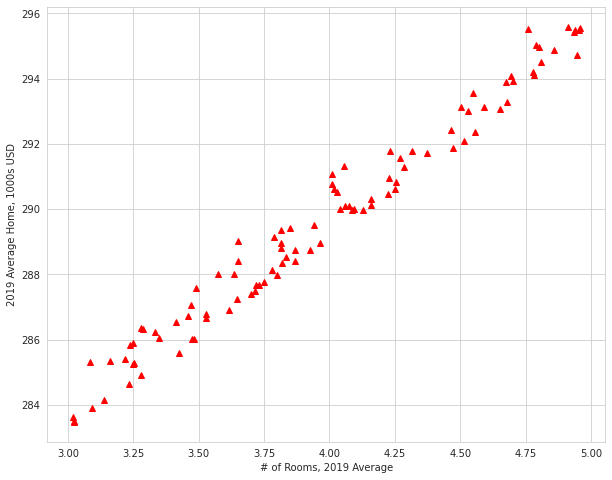

In [6]:
plt.plot(rooms, price, 'r^')
plt.xlabel("# of Rooms, 2019 Average")
plt.ylabel("2019 Average Home, 1000s USD")
plt.show()

In [7]:
X = rooms
y = price

LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)

[266.1216534] [[5.91181476]]


*Simple Algebra*
- y = mx + b
- b = intercept = 265.7

*Estimated Coefficients*
- LinReg.coef_ = [5.99] Estimated coefficients for the terms in the linear regression problem.

**Model Evaluation - R^2 👇👇**

In [8]:
print(LinReg.score(X,y))

0.9739014724761784


**Segment 2 - Multiple linear regression**

**(Multiple) linear regression on the enrollment data**

In [9]:
address = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSDKk4UPR6v4wxEMnVQ7ySU69iiSft0lazcvl-UlNfmBZ2k2AAG3mI5IQjDSFxk6DTrmbf4UapVC5uY/pub?output=csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


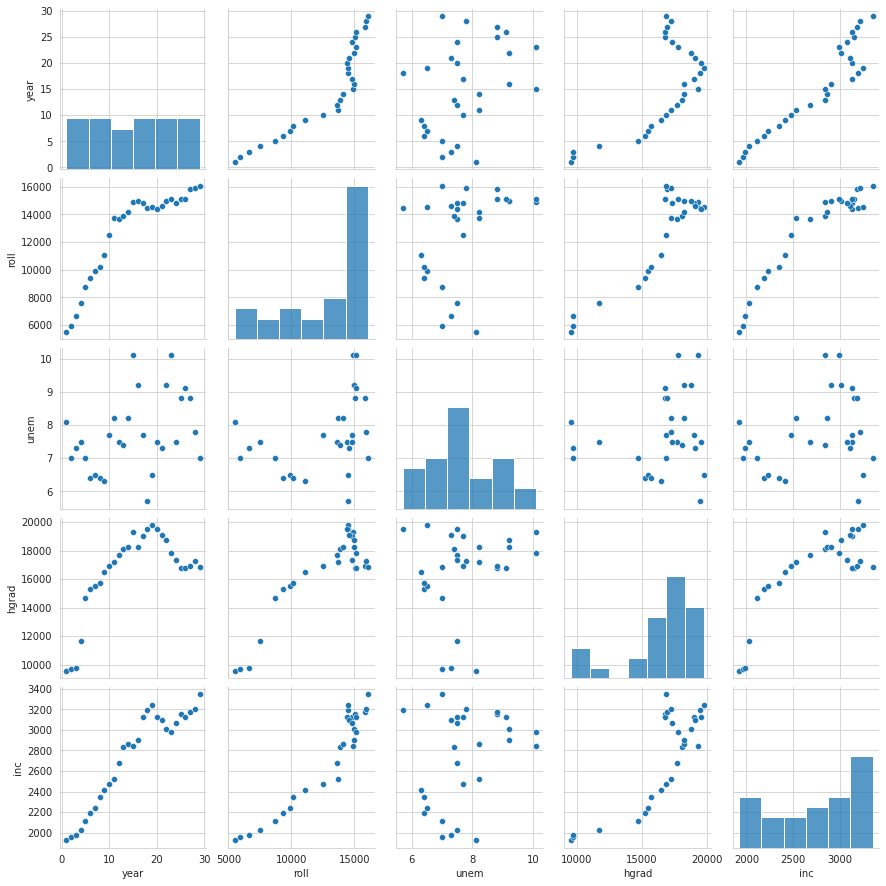

In [10]:
sb.pairplot(enroll)

In [11]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [12]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

**Checking for missing values**

In [13]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [14]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


***Segment 3 - Logistic regression***

In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [17]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

**Logistic regression on the titanic dataset**

In [18]:
address = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQe2QqZFzlRwNHgB-cx3YKdceYWrhzgwdqQLg5s4X90eyCOD1I67w-NbBOvJLkTiYbqeKhs4KjSMDaK/pub?output=csv'
titanic_training = pd.read_csv(address)
titanic_training.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
print(titanic_training.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [19]:
print(titanic_training.info())
#cabin only 204 records , so we must drop it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


VARIABLE DESCRIPTIONS

Survived - Survival (0 = No; 1 = Yes)
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name - Name
Sex - Sex
Age - Age
SibSp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare (British pound)
Cabin - Cabin
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)


# Checking that your target variable is binary

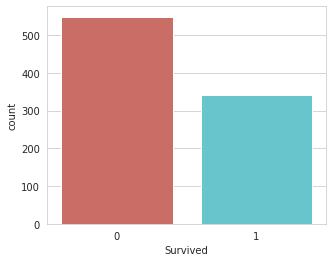

In [20]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')

# Checking for missing values

In [21]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Taking care of missing values

Dropping missing values

So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:

Survived - This variable is obviously relevant.
Pclass - Does a passenger's class on the boat affect their survivability?
Sex - Could a passenger's gender impact their survival rate?
Age - Does a person's age impact their survival rate?
SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.
What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these.

In [23]:
"""
Since a person's name, ticket number, and passenger ID number? 
They're irrelavant for predicting survivability. 
And as you recall, the cabin variable is almost all missing values,
so we can just drop all of these.
"""
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Imputing missing values

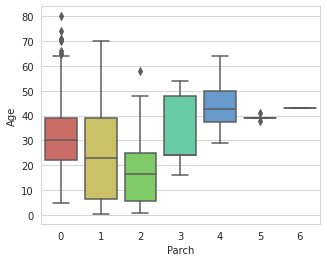

In [24]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')

In [25]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [26]:
# To fill the missed values in age as best appropriate, acc. to mean in contrast to relative numbers.
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
        
    else:
        return Age

In [27]:
titanic_data['Age']= titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [28]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


# Converting categorical variables to a dummy indicators

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [30]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [31]:
# 1 = male / 0 = female
gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender']) 
#👆Creating a new column in the dataframe for the dummy variable.
gender_DF.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [32]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [33]:
"""
Embarked data, right now is a multi-nomial categorical variable.
We need embarked to be represented in binary code(1 or 0), so, we'll use OneHotEncoder
and create 3 separate columns for each of the categories within the embarked variable.
"""
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [34]:
#Removing the original categorical data from the dataframe.
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [35]:
#Conacatenating our dataframe with the newely encoded binary variables.
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_DF], axis=1, verify_integrity=True).astype(float)
titanic_dmy[0:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


# Checking for independence between features

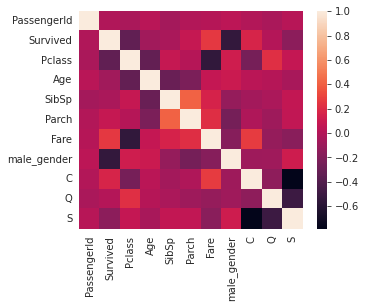

In [36]:
sb.heatmap(titanic_dmy.corr())

In [37]:
#Removing variable that not independent of one another.
titanic_dmy.drop(['Fare','Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


# Checking that your dataset size is sufficient

In [38]:
"""
For the data to be sufficient for a logistic regression, we, need 50 records for every predictive variable,
& we here have 6 predicyive variables, so, we need 300 records (6*50). 
Our data as below is 889, so, it is sufficient.
"""
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


# Break our data into train and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1),
                                                   titanic_dmy['Survived'], test_size=0.2,
                                                   random_state=200)
#random_state=200, is the seed, for the results to be the same as lecturer.

In [40]:
print(X_train.shape)
print(y_train.shape)

(711, 8)
(711,)


In [41]:
X_train[0:5]

,PassengerId,Age,SibSp,Parch,male_gender,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


# Deploying and evaluating the model

In [42]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)
#👇👇 these our default perimeters for our logistic regression model.

LogisticRegression(solver='liblinear')

# Making prediction

In [43]:
y_pred = LogReg.predict(X_test)

# Model Evaluation

# Classification report without cross-validation

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



# K-fold cross-validation & confusion matrices

In [45]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [46]:
precision_score(y_train, y_train_pred)

0.7407407407407407

# Make a test prediction

In [47]:
titanic_dmy[863:864]
#👇This is an example passenger.

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1,-1)

print(LogReg.predict(test_passenger)) #👈prediction.
print(LogReg.predict_proba(test_passenger)) #👈probability of being correct.

[1.]
[[0.26351831 0.73648169]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Chapter 4 - Clustering Models

# Segment 3 - DBSCan clustering to identify outliers

In [49]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [50]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# DBSCan clustering to identify outliers

# Train your model and identify outliers

In [51]:
# with this example, we're going to use the same data that we used for the rest of this chapter. So we're going to copy and 
# paste in the code. 
address = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRsN7KFOuHItz96C-Un2bWh4F3Z73-RcNtvlqveGjmR9RgWPVqER4kOnJnCq9A2wZ1mhus_91SJNOnN/pub?output=csv'
df = pd.read_csv(address, header=None, sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
model = DBSCAN(eps=0.8,  min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


# Visualize your results

In [53]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

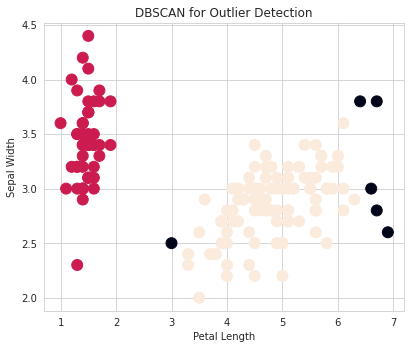

In [54]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,2], data[:,1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')

# Chapter 5 - Dimensionality Reduction Methods

# Segment 2 - Principal component analysis (PCA)

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import datasets

In [56]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [57]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# PCA on the iris dataset

In [58]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names

X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [59]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [60]:
pca.explained_variance_ratio_.sum()

1.0

In [61]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


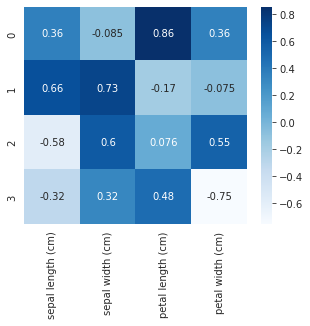

In [62]:
sb.heatmap(comps, cmap="Blues", annot=True)

# Chapter 6 - Other Popular Machine Learning Methods

# Segment 6 - Ensemble methods with random forest

This is a classification problem, where in we will be estimating the species label for iris flowers.

In [63]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

y.columns = ['labels']

print(df.head())
y[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


The data set contains information on the:

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
species type

In [66]:
df.isnull().any()==True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [67]:
print(y.labels.value_counts())

2    50
1    50
0    50
Name: labels, dtype: int64


# Preparing the data for training the model

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=17)

# Build a Random Forest model

In [69]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)

y_train_array = np.ravel(y_train)

classifier.fit(X_train, y_train_array)

y_pred = classifier.predict(X_test)

# Evaluating the model on the test data¶

In [70]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [71]:
y_test_array = np.ravel(y_test)
print(y_test_array)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [72]:
print(y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]
